In [1]:
import io
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd

# Carregar o arquivo do seu dispositivo local para o ambiente do Colab
uploaded = files.upload()

# Obter o nome do arquivo carregado
arquivo = list(uploaded.keys())[0]

# Utilizar a sintaxe with open para ler o arquivo e transformar em DataFrame
dados = []
with open(arquivo, 'r') as file:
    for linha in file:
        dados.append(linha.strip().split(','))

# Converta sua lista 'dados' em um DataFrame do Pandas
dados = pd.DataFrame(dados)

# Ajustar as colunas do DataFrame
colunas = ['data', 'precip', 'maxima', 'minima', 'horas_insol', 'temp_media', 'um_relativa', 'vel_vento']
dados.columns = colunas

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(dados.head())


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
#a) Visualização de intervalo de dados em modo texto:

def visualizar_intervalo_dados(dados):
    # Remover a primeira linha (cabeçalho duplicado)
    dados = dados.drop(0)

    # Converter a coluna 'data' para o tipo datetime
    dados['data'] = pd.to_datetime(dados['data'], format='%d/%m/%Y')

    # Solicitar entradas do usuário
    mes_inicial = int(input("Informe o mês inicial (1-12): "))
    ano_inicial = int(input("Informe o ano inicial: "))
    mes_final = int(input("Informe o mês final (1-12): "))
    ano_final = int(input("Informe o ano final: "))

    # Solicitar o tipo de dados desejado
    print("\nEscolha o tipo de dados:")
    print("1 - Todos os dados")
    print("2 - Apenas precipitação")
    print("3 - Apenas temperatura")
    print("4 - Apenas umidade e vento")

    escolha_tipo_dados = int(input("Digite o número correspondente: "))

    # Filtrar os dados conforme as preferências do usuário
    dados_filtrados = dados[(dados['data'].dt.month >= mes_inicial) &
                            (dados['data'].dt.month <= mes_final) &
                            (dados['data'].dt.year >= ano_inicial) &
                            (dados['data'].dt.year <= ano_final)]

    if escolha_tipo_dados == 2:
        dados_filtrados = dados_filtrados[dados_filtrados['precip'] != '0']
    elif escolha_tipo_dados == 3:
        dados_filtrados = dados_filtrados[(dados_filtrados['maxima'] != '0') &
                                           (dados_filtrados['minima'] != '0')]
    elif escolha_tipo_dados == 4:
        dados_filtrados = dados_filtrados[(dados_filtrados['um_relativa'] != '0') &
                                           (dados_filtrados['vel_vento'] != '0')]

    # Exibir os dados filtrados
    print("\nDados no período selecionado:")
    print(dados_filtrados)

# Chamar a função com os dados carregados
visualizar_intervalo_dados(dados)


NameError: name 'dados' is not defined

In [ ]:
# b) mês mais chuvoso
def mes_mais_chuvoso(dados):
    precipitacao_por_mes_ano = {}

    for indice, linha in dados.iloc[1:].iterrows():  # Pular a primeira linha (cabeçalhos)
        # Extrair o mês, ano e precipitação de cada linha
        data = pd.to_datetime(linha['data'], format='%d/%m/%Y')
        mes = data.month
        ano = data.year
        precipitacao = float(linha['precip'])

        # Atualizar o total de precipitação para o mês/ano atual
        chave = (mes, ano)
        if chave not in precipitacao_por_mes_ano:
            precipitacao_por_mes_ano[chave] = 0
        precipitacao_por_mes_ano[chave] += precipitacao

    # Encontrar o mês/ano mais chuvoso
    mes_ano_mais_chuvoso = max(precipitacao_por_mes_ano, key=precipitacao_por_mes_ano.get)

    return mes_ano_mais_chuvoso

# Chamar a função e armazenar o resultado
mes_ano_mais_chuvoso = mes_mais_chuvoso(dados)

# Extrair o mês e ano mais chuvosos
mes_mais_chuvoso, ano_mais_chuvoso = mes_ano_mais_chuvoso

# Imprimir resultados
print("O mês mais chuvoso foi:", mes_mais_chuvoso)
print("O ano mais chuvoso foi:", ano_mais_chuvoso)


O mês mais chuvoso foi: 6
O ano mais chuvoso foi: 1984


In [ ]:
#c) Média da temperatura mínima de um determinado mês (auge do inverno) nos últimos 11 anos (2006 a 2016):

def mes_mais_chuvoso(dados):
    precipitacao_por_mes_ano = {}

    # Ignorar a primeira linha (cabeçalho)
    dados = dados.iloc[1:]

    for indice, linha in dados.iterrows():
        # Extrair o mês, ano e precipitação de cada linha
        data = pd.to_datetime(linha['data'], format='%d/%m/%Y')
        mes = data.month
        ano = data.year
        precipitacao = float(linha['precip'])

        chave = (mes, ano)

        if chave not in precipitacao_por_mes_ano:
            precipitacao_por_mes_ano[chave] = 0

        precipitacao_por_mes_ano[chave] += precipitacao

    mes_ano_mais_chuvoso = max(precipitacao_por_mes_ano, key=precipitacao_por_mes_ano.get)

    # Encontrar a maior precipitação no mês mais chuvoso
    maior_precipitacao_mes_chuvoso = dados.loc[(pd.to_datetime(dados['data'], format='%d/%m/%Y').dt.month == mes_ano_mais_chuvoso[0]) &
                                               (pd.to_datetime(dados['data'], format='%d/%m/%Y').dt.year == mes_ano_mais_chuvoso[1]) &
                                               (dados['precip'] == dados['precip'].max())]

    # Verificar se há resultados antes de acessar o primeiro elemento
    if len(maior_precipitacao_mes_chuvoso) > 0:
        maior_precipitacao_mes_chuvoso_dict = maior_precipitacao_mes_chuvoso.to_dict('records')[0]
    else:
        maior_precipitacao_mes_chuvoso_dict = None

    # Armazenar os resultados em um dicionário
    resultado = {
        'mes_mais_chuvoso': mes_ano_mais_chuvoso[0],
        'ano_mais_chuvoso': mes_ano_mais_chuvoso[1],
        'maior_precipitacao_mes_chuvoso': maior_precipitacao_mes_chuvoso_dict
    }

    return resultado

def calcular_media_temperatura_minima(dados, mes, ano):
    # Filtrar os dados para o mês e ano especificados
    dados_filtrados = dados[(pd.to_datetime(dados['data'], format='%d/%m/%Y').dt.month == mes) &
                            (pd.to_datetime(dados['data'], format='%d/%m/%Y').dt.year == ano)]

    # Calcular a média da temperatura mínima
    media_temperatura_minima = dados_filtrados['minima'].mean()

    return media_temperatura_minima

# Validar entrada do usuário para o mês
while True:
    mes = input("Informe o mês desejado (1-12): ")
    if mes.isdigit():
        mes = int(mes)
        if 1 <= mes <= 12:
            break
    print("Mês inválido. Por favor, insira um mês válido.")

# Chamar a função mes_mais_chuvoso para obter o ano mais chuvoso
resultado_mes_chuvoso = mes_mais_chuvoso(dados)

# Iterar de 2006 a 2016
for ano in range(2006, 2017):
    # Calcular a média da temperatura mínima para o mês informado e o ano atual
    media_temp_minima = calcular_media_temperatura_minima(dados, mes, ano)

    # Exibir a média da temperatura mínima para o ano atual
    print(f"Média da temperatura mínima para o mês {mes} do ano {ano}: {media_temp_minima:.2f}°C")


Informe o mês desejado (1-12): 1


ValueError: time data 'data' does not match format '%d/%m/%Y' (match)

In [ ]:
# c) Média da temperatura mínima de um determinado mês (auge do inverno) nos últimos 11 anos (2006 a 2016):
import pandas as pd

def calcular_media_temperatura_minima(dados, mes):
    media_temperatura_por_ano = {}

    # Filtrar os dados para o mês especificado
    dados_mes = dados[pd.to_datetime(dados['data'], format='%d/%m/%Y').dt.month == mes]

    for ano in range(2006, 2017):
        # Filtrar os dados para o ano atual
        dados_ano = dados_mes[pd.to_datetime(dados_mes['data'], format='%d/%m/%Y').dt.year == ano]

        # Calcular a média da temperatura mínima para o mês e ano atuais
        media_temp_minima = dados_ano['minima'].mean()

        # Armazenar a média no dicionário
        media_temperatura_por_ano[ano] = media_temp_minima

    return media_temperatura_por_ano

# Carregar os dados (substitua 'dados.csv' pelo nome do seu arquivo CSV)
dados = pd.read_csv('Anexo_Arquivo_Dados_Projeto_Logica_e_programacao_de_computadores.csv')

# Validar entrada do usuário para o mês
while True:
    mes = input("Informe o mês desejado (1-12): ")
    if mes.isdigit():
        mes = int(mes)
        if 1 <= mes <= 12:
            break
    print("Mês inválido. Por favor, insira um mês válido.")

# Calcular a média da temperatura mínima para o mês informado nos últimos 11 anos
media_temperatura_minima_por_ano = calcular_media_temperatura_minima(dados, mes)

# Exibir os resultados
for ano, media in media_temperatura_minima_por_ano.items():
    print(f"Média da temperatura mínima para o mês {mes} do ano {ano}: {media:.2f}°C")



Informe o mês desejado (1-12): 2
Média da temperatura mínima para o mês 2 do ano 2006: 20.76°C
Média da temperatura mínima para o mês 2 do ano 2007: 20.50°C
Média da temperatura mínima para o mês 2 do ano 2008: 20.02°C
Média da temperatura mínima para o mês 2 do ano 2009: 20.69°C
Média da temperatura mínima para o mês 2 do ano 2010: 22.22°C
Média da temperatura mínima para o mês 2 do ano 2011: 21.73°C
Média da temperatura mínima para o mês 2 do ano 2012: 22.30°C
Média da temperatura mínima para o mês 2 do ano 2013: 20.81°C
Média da temperatura mínima para o mês 2 do ano 2014: 21.85°C
Média da temperatura mínima para o mês 2 do ano 2015: 21.17°C
Média da temperatura mínima para o mês 2 do ano 2016: 21.81°C


Informe o mês desejado (1-12): 1


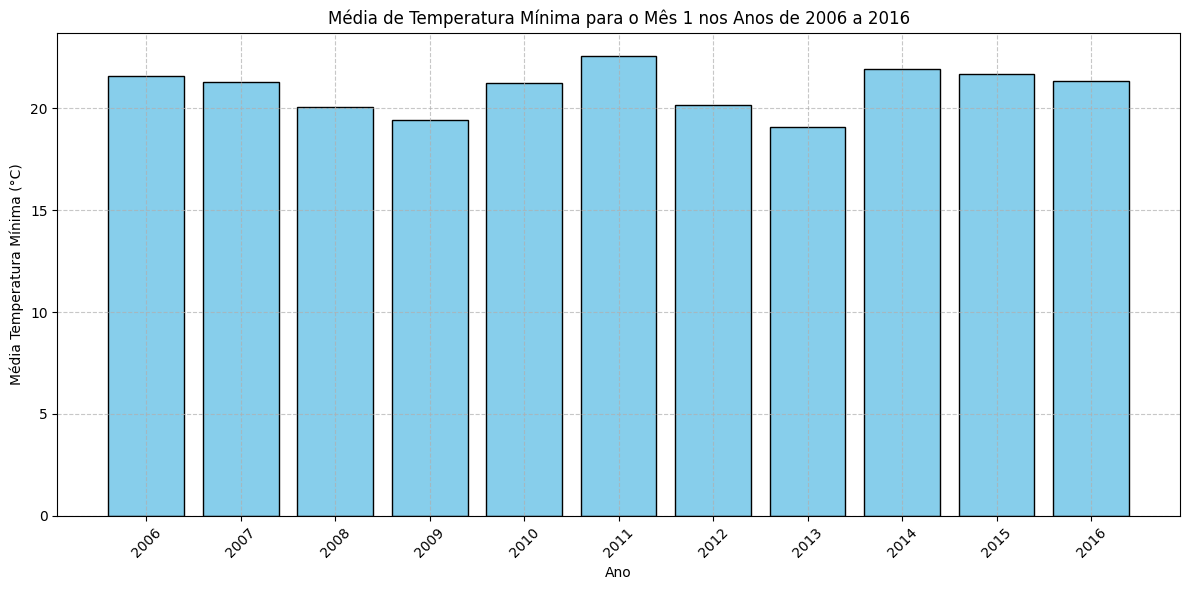

In [ ]:
#d)d) Gráfico de barras (vertical ou horizontal) com as médias de temperatura mínima de um determinado mês nos últimos 11 anos. (2006 a 2016).


def plotar_grafico_media_temperatura_minima(dados):
    # Converter a coluna 'data' para o tipo datetime
    dados['data'] = pd.to_datetime(dados['data'], format='%d/%m/%Y')

    # Definir os anos inicial e final
    ano_inicial = 2006
    ano_final = 2016

    # Solicitar o mês desejado
    while True:
        mes_escolhido = input("Informe o mês desejado (1-12): ")
        if mes_escolhido.isdigit():
            mes_escolhido = int(mes_escolhido)
            if 1 <= mes_escolhido <= 12:
                break
        print("Mês inválido. Por favor, insira um mês válido.")

    # Criar dicionário para armazenar a média da temperatura mínima por ano e mês
    media_temperatura_minima = {}

    # Iterar sobre os anos
    for ano in range(ano_inicial, ano_final + 1):
        # Filtrar os dados para o ano atual
        dados_ano_atual = dados[dados['data'].dt.year == ano]

        # Filtrar os dados para o mês escolhido
        dados_mes_atual = dados_ano_atual[dados_ano_atual['data'].dt.month == mes_escolhido]

        # Calcular a média da temperatura mínima para o mês e ano atual
        media_minima_mes_ano = dados_mes_atual['minima'].mean()

        # Armazenar a média no dicionário
        chave = f"{ano}"
        media_temperatura_minima[chave] = media_minima_mes_ano

    # Criar um DataFrame a partir do dicionário
    df = pd.DataFrame(list(media_temperatura_minima.items()), columns=['Ano', 'Média Temperatura Mínima'])

    # Plotar o gráfico de barras
    plt.figure(figsize=(12, 6))
    plt.bar(df['Ano'], df['Média Temperatura Mínima'], color='skyblue', edgecolor='black')

    # Adicionar rótulos e legendas
    plt.xlabel('Ano')
    plt.ylabel('Média Temperatura Mínima (°C)')
    plt.title(f'Média de Temperatura Mínima para o Mês {mes_escolhido} nos Anos de {ano_inicial} a {ano_final}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Exibir o gráfico
    plt.show()

# Exemplo de uso
dados = pd.read_csv('Anexo_Arquivo_Dados_Projeto_Logica_e_programacao_de_computadores.csv')
plotar_grafico_media_temperatura_minima(dados)



Informe o ano inicial: 2006
Informe o ano final: 2006
Informe o mês desejado (1-12): 2
Média da temperatura mínima em 2/2006: 20.76°C


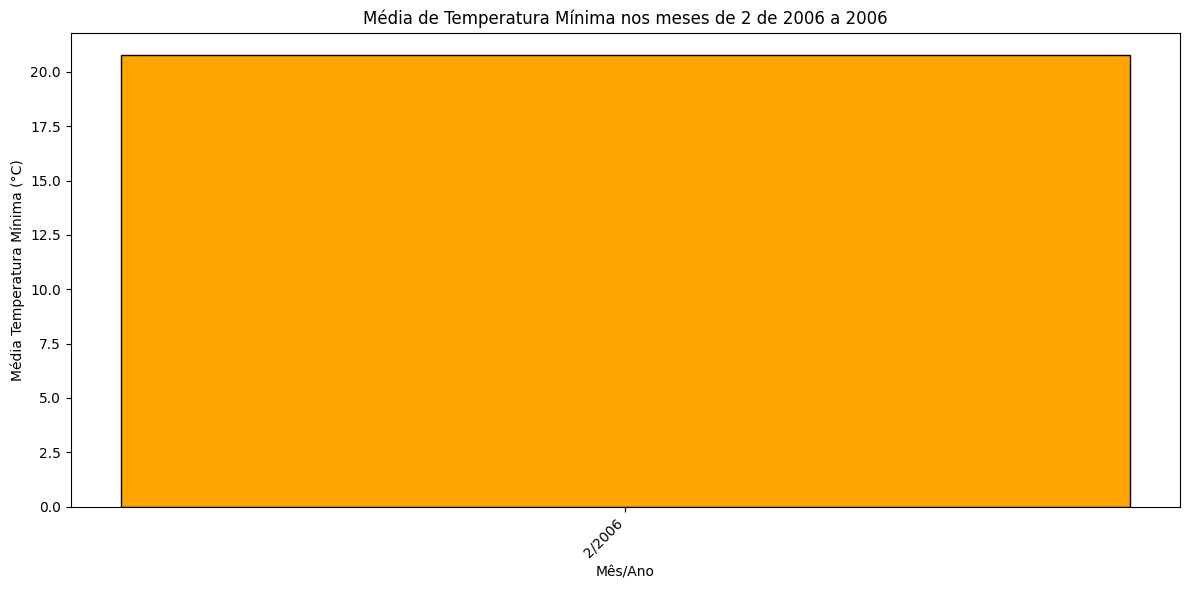

In [ ]:
#novo grafico

def plotar_grafico_media_temperatura_minima():
    # Solicitar entrada do usuário para o ano inicial, ano final e mês
    ano_inicial = int(input("Informe o ano inicial: "))
    ano_final = int(input("Informe o ano final: "))

    while True:
        mes_escolhido = input("Informe o mês desejado (1-12): ")
        if mes_escolhido.isdigit():
            mes_escolhido = int(mes_escolhido)
            if 1 <= mes_escolhido <= 12:
                break
        print("Mês inválido. Por favor, insira um mês válido.")

    # Criar dicionário para armazenar a média da temperatura mínima por ano e mês
    media_temperatura_minima = {}

    # Iterar sobre os anos
    for ano in range(ano_inicial, ano_final + 1):
        # Filtrar os dados para o ano atual
        dados_ano_atual = dados[dados['data'].dt.year == ano]

        # Filtrar os dados para o mês escolhido
        dados_mes_atual = dados_ano_atual[dados_ano_atual['data'].dt.month == mes_escolhido]

        # Calcular a média da temperatura mínima para o mês e ano atual
        media_minima_mes_ano = dados_mes_atual['minima'].mean()

        # Armazenar a média no dicionário
        chave = f"{mes_escolhido}/{ano}"
        media_temperatura_minima[chave] = media_minima_mes_ano

        # Apresentar resultado para o ano atual
        print(f"Média da temperatura mínima em {mes_escolhido}/{ano}: {media_minima_mes_ano:.2f}°C")

    # Criar um DataFrame a partir do dicionário
    df = pd.DataFrame(list(media_temperatura_minima.items()), columns=['Mês/Ano', 'Média Temperatura Mínima'])

    # Plotar o gráfico de barras verticais
    plt.figure(figsize=(12, 6))
    plt.bar(df['Mês/Ano'], df['Média Temperatura Mínima'], color='orange', edgecolor='black')

    # Adicionar rótulos e legendas
    plt.xlabel('Mês/Ano')
    plt.ylabel('Média Temperatura Mínima (°C)')
    plt.title(f'Média de Temperatura Mínima nos meses de {mes_escolhido} de {ano_inicial} a {ano_final}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Exibir o gráfico
    plt.show()

# Exemplo de uso
plotar_grafico_media_temperatura_minima()


In [ ]:
#e)#e) Média geral da temperatura mínima de um determinado mês nos últimos 11 anos (2006 a 2016):
def mes_mais_chuvoso(dados):
    precipitacao_por_mes_ano = {}

    # Ignorar a primeira linha (cabeçalho)
    dados = dados.iloc[1:]

    for indice, linha in dados.iterrows():
        # Extrair o mês, ano e precipitação de cada linha
        data = pd.to_datetime(linha['data'], format='%d/%m/%Y')
        mes = data.month
        ano = data.year
        precipitacao = float(linha['precip'])

        chave = (mes, ano)

        if chave not in precipitacao_por_mes_ano:
            precipitacao_por_mes_ano[chave] = {'precipitacao': 0, 'temperatura_total': 0, 'contador': 0}

        precipitacao_por_mes_ano[chave]['precipitacao'] += precipitacao
        precipitacao_por_mes_ano[chave]['temperatura_total'] += float(linha['temp_media'])
        precipitacao_por_mes_ano[chave]['contador'] += 1

    # Encontrar o mês mais chuvoso
    mes_ano_mais_chuvoso = max(precipitacao_por_mes_ano, key=lambda x: precipitacao_por_mes_ano[x]['precipitacao'])

    # Calcular a média geral da temperatura para o mês mais chuvoso
    temperatura_media_mes_chuvoso = precipitacao_por_mes_ano[mes_ano_mais_chuvoso]['temperatura_total'] / precipitacao_por_mes_ano[mes_ano_mais_chuvoso]['contador']

    # Armazenar os resultados em um dicionário
    resultado = {
        'mes_mais_chuvoso': mes_ano_mais_chuvoso[0],
        'ano_mais_chuvoso': mes_ano_mais_chuvoso[1],
        'temperatura_media_mes_chuvoso': temperatura_media_mes_chuvoso
    }

    return resultado

# Chamar a função com os dados carregados
resultado_mes_chuvoso = mes_mais_chuvoso(dados)

print("O mês mais chuvoso foi:", resultado_mes_chuvoso['mes_mais_chuvoso'])
print("O ano mais chuvoso foi:", resultado_mes_chuvoso['ano_mais_chuvoso'])
print("A média geral da temperatura para o mês mais chuvoso foi:", resultado_mes_chuvoso['temperatura_media_mes_chuvoso'])


O mês mais chuvoso foi: 6
O ano mais chuvoso foi: 1984
A média geral da temperatura para o mês mais chuvoso foi: 14.150666666666666
